
# Plots modules usage

To use `numerical_function_spaces.orlicz_spaces.plots` in a project:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import numerical_function_spaces.orlicz_spaces as osm

In [2]:
def Orlicz_function(u):
    return np.where(u <= 1, 0, u ** 3 - 1)

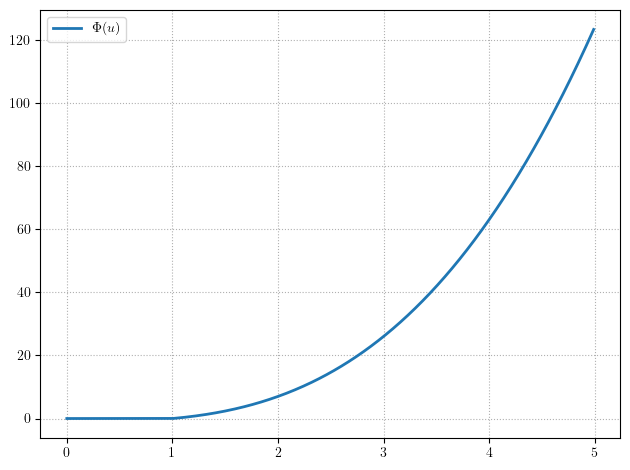

In [3]:
osm.plot_Phi(Orlicz_function, du=0.01, u_max=5, max_u_on_plots=5)

In [4]:
# constant function
len_t = 1
x_1 = np.zeros(shape=(2, len_t))
x_1[1, 0] = 1  # measure of supports
x_1[0, 0] = 1  # values

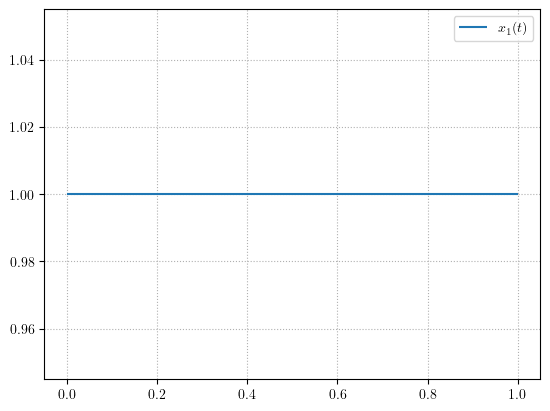

In [5]:
for i in range(0, len_t):
    plt.hlines(y=x_1[0, i], xmin=sum([j for j in x_1[1, 0:i]]), xmax=sum([j for j in x_1[1, 0:i + 1]]),
               label='$x_1(t)$' if i == 0 else None, )
plt.legend()
plt.show()
plt.close()

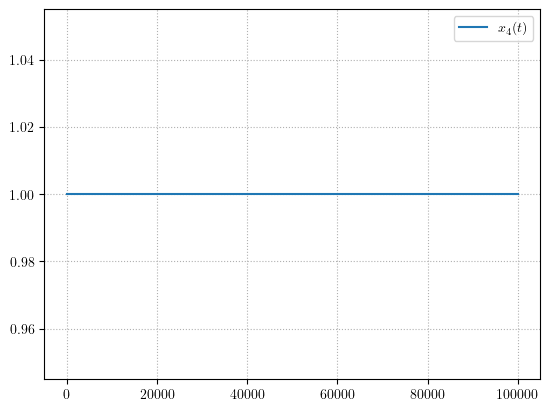

In [6]:
# nieskończony nośnik
len_t = 1  # ile zbiorów w dziedzinie - mogą być nieskończone -  to nie jest długość dziedziny
x_4 = np.zeros(shape=(2, len_t))
x_4[1, :] = np.inf  # miara nośnika 
x_4[0, :] = 1  # wartości
plt.plot([0, 100000], [1, 1], label='$x_4(t)$')
plt.legend()
plt.show()
plt.close()

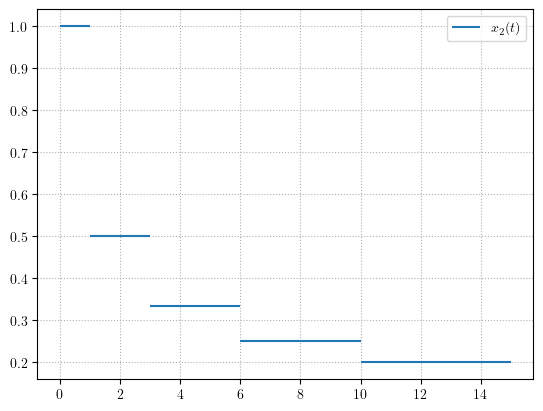

In [7]:
# funkcja z różnymi nośnikami
len_t = 5  # ile zbiorów w dziedzinie - mogą być nieskończone -  to nie jest długość dziedziny
x_2 = np.zeros(shape=(2, len_t))  # x będzie macierzą. w pierwszym wierszu wartości w drugim miara nośnika do wartości
for i in range(len_t):
    x_2[1, i] = i + 1  # najpierw podaj miary nośników
    x_2[0, i] = 1 / (i + 1)  # potem wartości 
for i in range(0, len(x_2[1, :])):
    plt.hlines(y=x_2[0, i], xmin=sum([j for j in x_2[1, 0:i]]), xmax=sum([j for j in x_2[1, 0:i + 1]]),
               label='$x_2(t)$' if i == 0 else None)
plt.legend()
plt.show()
plt.close()

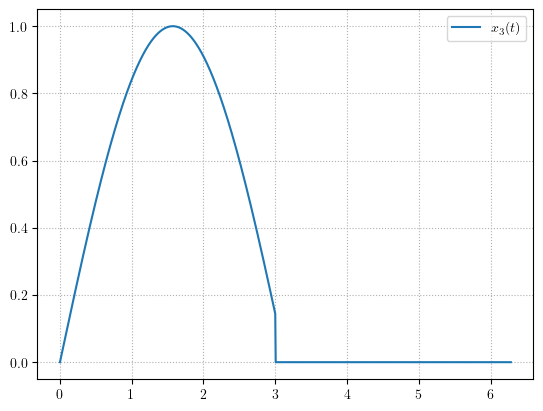

In [8]:
# funkcja definiowana na przedziale - z równymi nośnikami
t_max = 2 * np.pi
len_t = 1000
x_3 = np.zeros(shape=(2, len_t))  # x będzie macierzą. w pierwszym wierszu wartości w drugim miara nośnika do wartości
x_3[1, :] = t_max / len_t  # miara nośnika
for i in range(len_t):
    arg = t_max / len_t * i
    if arg <= 3:
        x_3[0, i] = np.sin(arg)
plt.plot(np.linspace(0, t_max, len(x_3[1, :])), x_3[0], label='$x_3(t)$')
plt.legend()
plt.show()
plt.close()

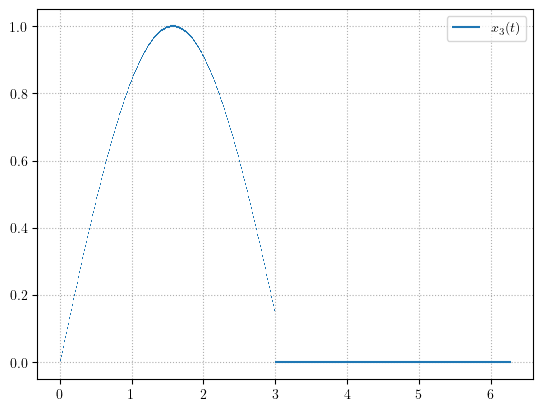

In [9]:
for i in range(0, len_t):
    plt.hlines(y=x_3[0, i], xmin=sum([j for j in x_3[1, 0:i]]), xmax=sum([j for j in x_3[1, 0:i + 1]]),
               label='$x_3(t)$' if i == 0 else None, )
plt.legend()
plt.show()
plt.close()

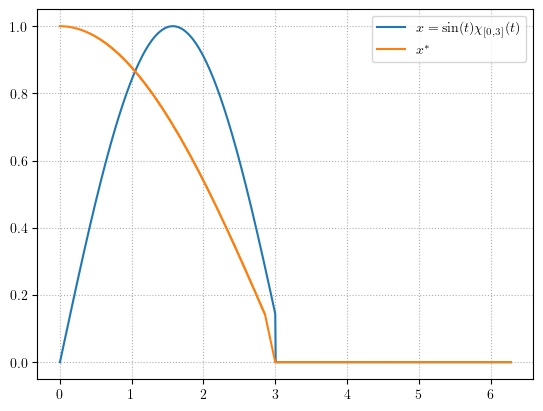

In [10]:
# non-incerasing rearangement
# x_3_ri = np.sort(abs(x_3[0,:]))[::-1]
x_3_ri = x_3[::, x_3[0,].argsort()[::-1]]  # malejąco
# x_3_ri = x_3[::, x_3[0,].argsort()[::1]]  # rosnąco
plt.plot(np.linspace(0, t_max, len(x_3[1, :])), x_3[0, :], label='$x = \sin(t)\chi_{[0,3]}(t)$')
plt.plot(np.linspace(0, t_max, len(x_3[1, :])), x_3_ri[0, :], label='$x^*$')
# plt.plot(np.linspace(0, t_max, len(x_3[1, :])), np.cos(np.linspace(0, t_max, len(x_3[1, :]))/2), label='$\cos(\\frac{t}{2})$')
plt.legend()
plt.show()
plt.close()

## $\kappa$ (kappa) function
Let $x\in L_{\Phi,p}.$ For any $k \in (0,\infty) $ define function
$\kappa_{p,x}(k)\colon (0,\infty) \rightarrow (0,\infty]$ by formula
\begin{equation*}
    \kappa_{p,x}(k) =  \frac{1}{k}s_p\left(I_{\Phi }(kx)\right).
\end{equation*}
Then $K_{p}(x)$ is equal to set of such $k$ for which  $\kappa_{p,x}(k)$ has infimum.

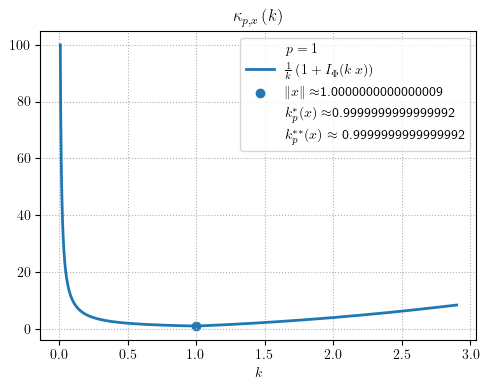

In [11]:
osm.plot_kappa(Orlicz_function, x_1,
               k_min=0.01,
               k_max=2.9,
               dk=0.001,
               p_norm=1,
               show_progress=False,
               save=False)

In [12]:
k_min = .1
k_max = 5
dk = 0.01

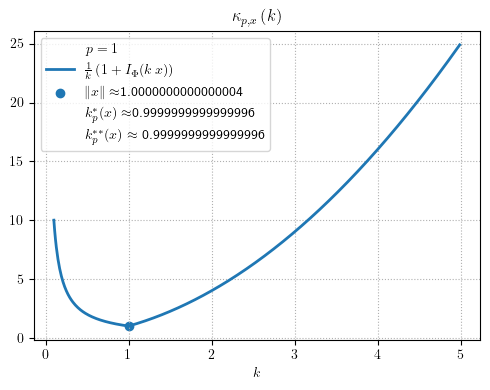

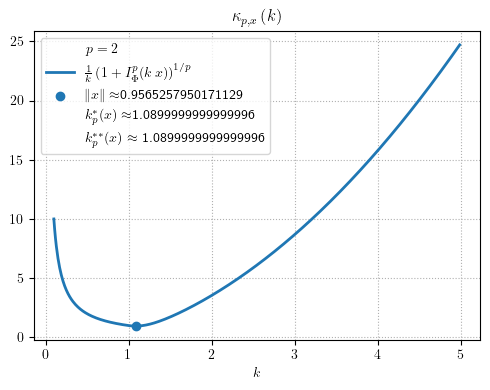

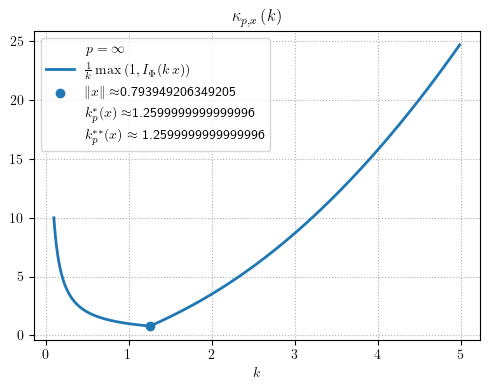

In [13]:
for p_norm in [1, 2, np.inf]:
    osm.plot_kappa(Orlicz_function, x_1,
                   k_min=k_min,
                   k_max=k_max,
                   dk=dk,
                   p_norm=p_norm,
                   save=False)

In [14]:
def Orlicz_function(u):
    res = np.zeros(len(u))
    for i in range(len(u)):
        if u[i] <= 1:
            res[i] = u[i] ** 2
        elif u[i] <= 2:
            res[i] = 2 * u[i] - 1
        else:
            res[i] = (u[i] - 1) ** 2 + 2
    return res

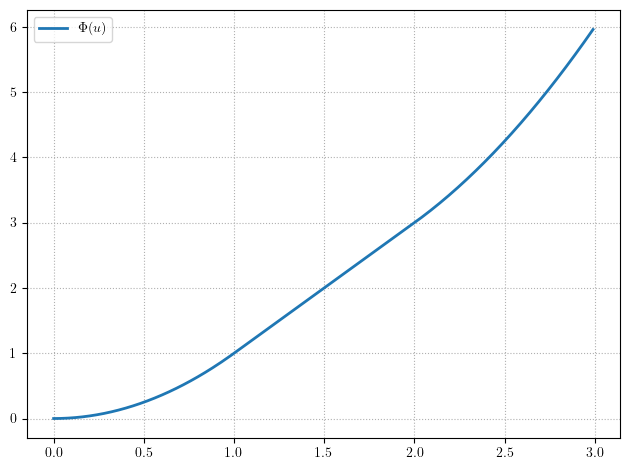

In [15]:
osm.plot_Phi(Orlicz_function, du=0.01, u_max=3, max_u_on_plots=3)

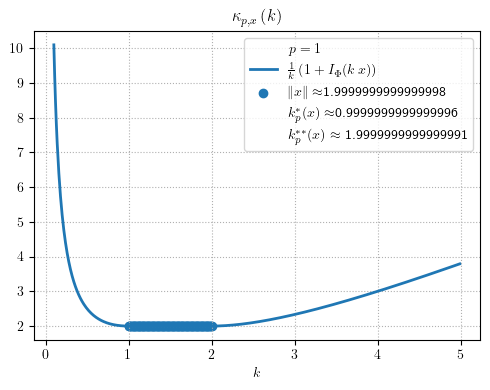

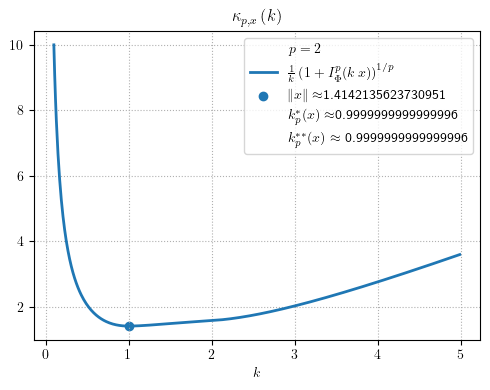

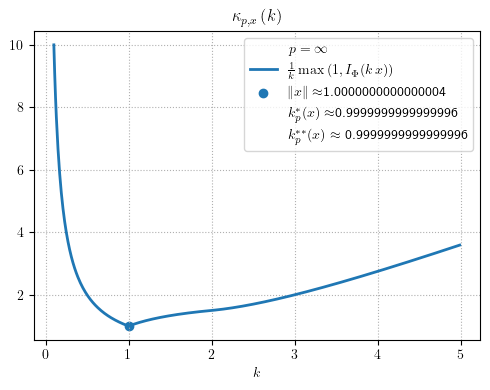

In [16]:
for p_norm in [1, 2, np.inf]:
    osm.plot_kappa(Orlicz_function, x_1,
                   k_min=k_min,
                   k_max=k_max,
                   dk=dk,
                   p_norm=p_norm,
                   save=False)

In [17]:
def Orlicz_function(u):
    res = np.zeros(len(u))
    for i in range(len(u)):
        if u[i] <= 1:
            res[i] = 0
        elif u[i] <= 2:
            res[i] = u[i] - 1
        else:
            res[i] = np.inf
    return res

# the same function as above
# def Orlicz_function(u):
#     return np.where(u <= 1, 0, np.where(u <= 2, u - 1, np.inf))

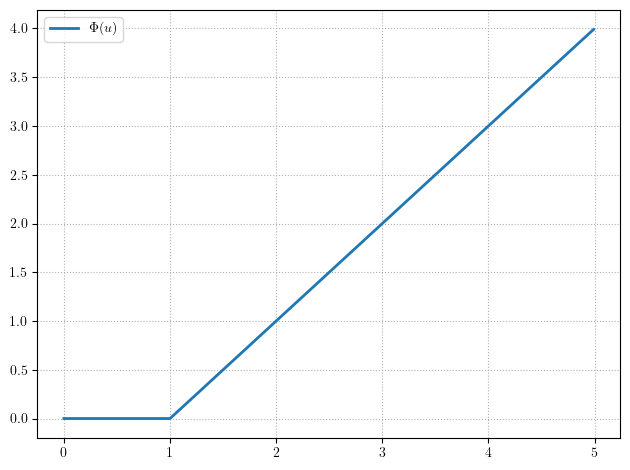

In [27]:
osm.plot_Phi(Orlicz_function, du=0.01, u_max=5, max_u_on_plots=5)

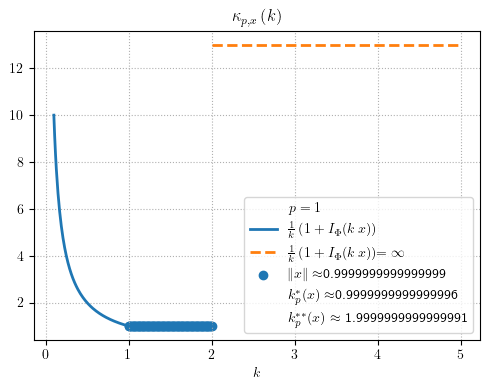

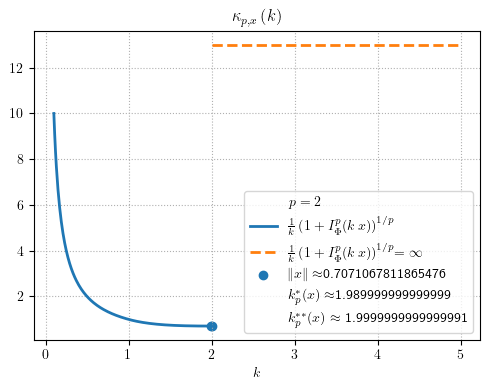

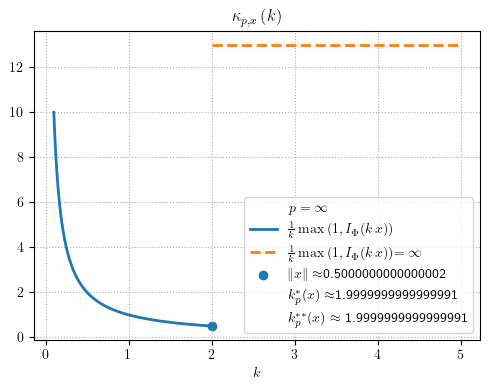

In [19]:
for p_norm in [1, 2, np.inf]:
    osm.plot_kappa(Orlicz_function, x_1,
                   k_min=k_min,
                   k_max=k_max,
                   dk=dk,
                   p_norm=p_norm,
                   save=False)

In [20]:
def Orlicz_function(u):
    res = np.zeros(len(u))
    for i in range(len(u)):
        if u[i] <= 1:
            res[i] = 0
        else:
            res[i] = u[i] - 1
    return res

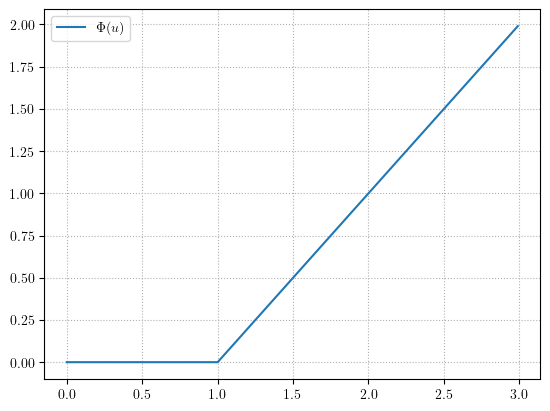

In [21]:
u_domain = np.arange(0, 3, 0.01)
plt.plot(u_domain, Orlicz_function(u_domain), label='$\Phi(u)$')
plt.legend()
plt.show()
plt.close()

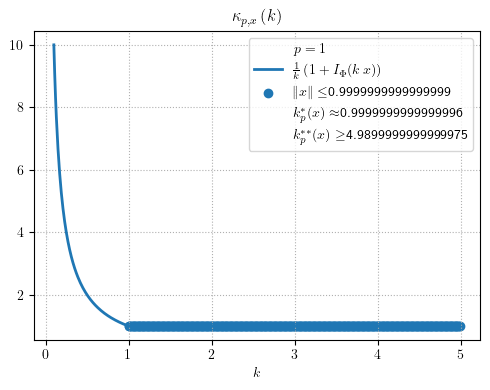

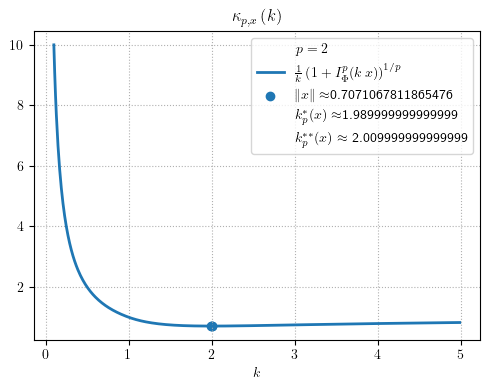

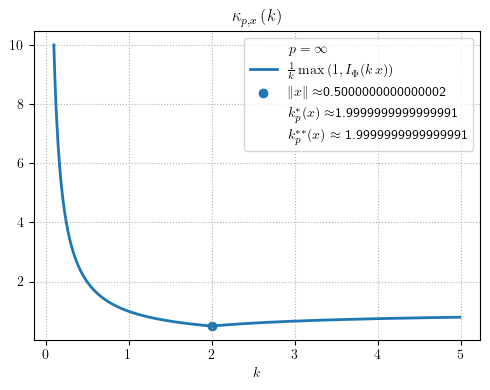

In [22]:
for p_norm in [1, 2, np.inf]:
    osm.plot_kappa(Orlicz_function, x_1,
                   k_min=k_min,
                   k_max=k_max,
                   dk=dk,
                   p_norm=p_norm,
                   save=False)

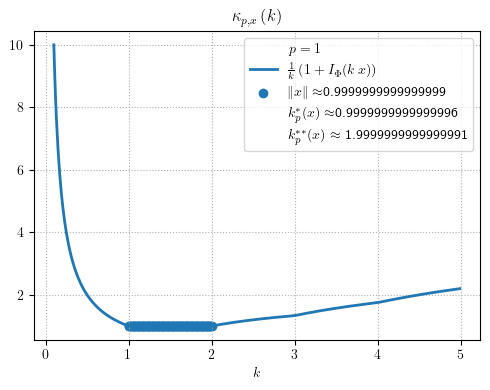

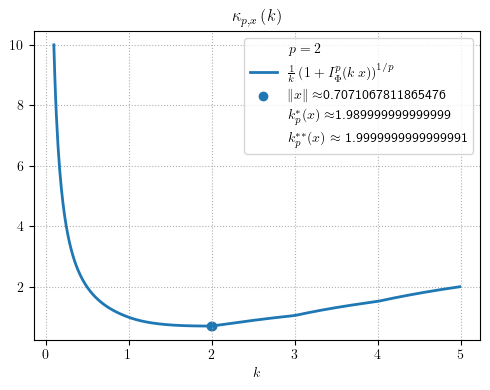

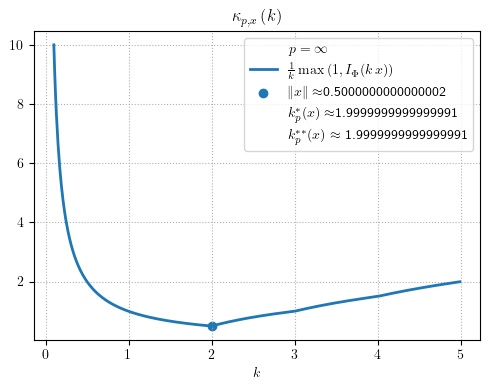

In [23]:
for p_norm in [1, 2, np.inf]:
    osm.plot_kappa(Orlicz_function, x_2,
                   k_min=k_min,
                   k_max=k_max,
                   dk=dk,
                   p_norm=p_norm,
                   save=False)

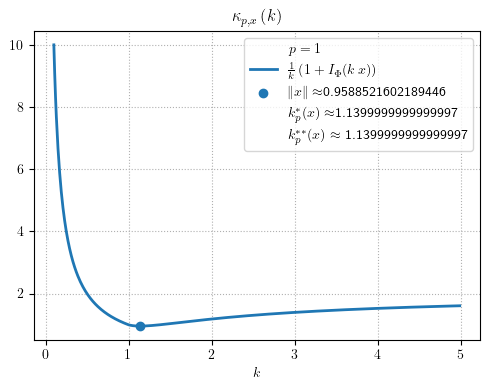

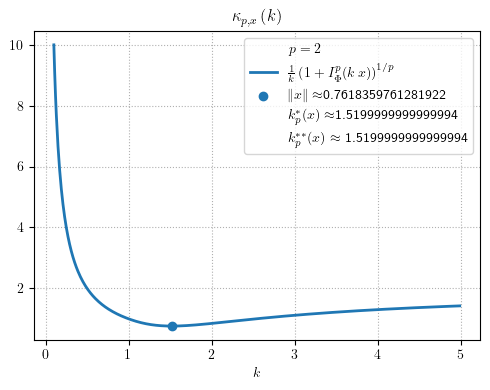

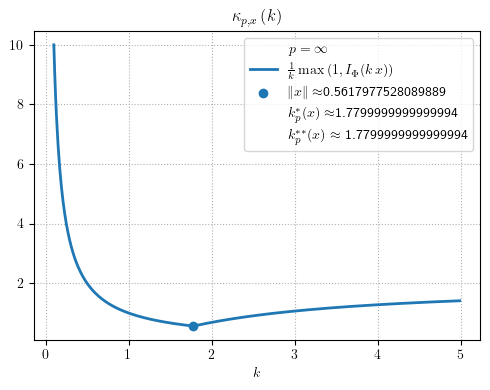

In [24]:
for p_norm in [1, 2, np.inf]:
    osm.plot_kappa(Orlicz_function, x_3,
                   k_min=k_min,
                   k_max=k_max,
                   dk=dk,
                   p_norm=p_norm,
                   save=False)

It is known, that for Orlicz norm for such Orlicz function we have $$||x|| = \int_0^1 x^{*}(t)\,d\mu(t)$$ 
so $$||x_3|| = \int_0^1 \cos{\frac{t}{2}}\,dt = 2\sin{\frac{1}{2}}$$ and we may check accuracy of calculation by

In [25]:
osm.Orlicz_norm_with_stars(Orlicz_function, x=x_3)[0]  - 2 * np.sin(1 / 2)

np.float64(2.751016016100394e-07)

C:\Users\Adam\OneDrive - Zachodniopomorski Uniwersytet Technologiczny w Szczecinie\numerical_function_spaces\src\numerical_function_spaces\orlicz_spaces\norms.py:50: RuntimeWarning: invalid value encountered in multiply
  return 1 / k * (1 + np.nansum(Orlicz_function((k * x[0, :])) * x[1, :]))


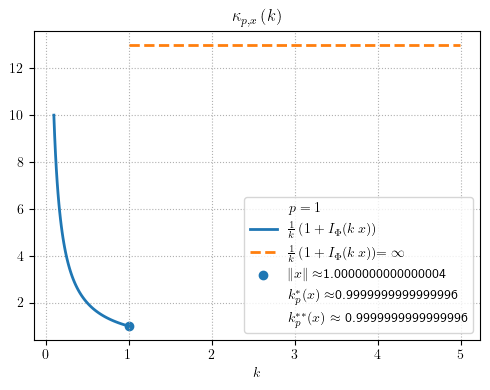

C:\Users\Adam\OneDrive - Zachodniopomorski Uniwersytet Technologiczny w Szczecinie\numerical_function_spaces\src\numerical_function_spaces\orlicz_spaces\norms.py:54: RuntimeWarning: invalid value encountered in multiply
  return 1 / k * (1 + (np.nansum(Orlicz_function((k * x[0, :])) * x[1, :]) ** p_norm)) ** (1 / p_norm)


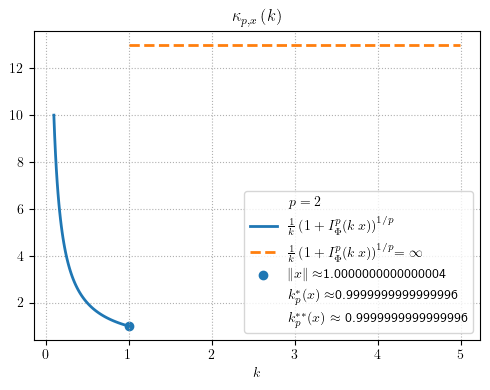

C:\Users\Adam\OneDrive - Zachodniopomorski Uniwersytet Technologiczny w Szczecinie\numerical_function_spaces\src\numerical_function_spaces\orlicz_spaces\norms.py:52: RuntimeWarning: invalid value encountered in multiply
  return 1 / k * (max(1, np.nansum(Orlicz_function((k * x[0, :])) * x[1, :])))


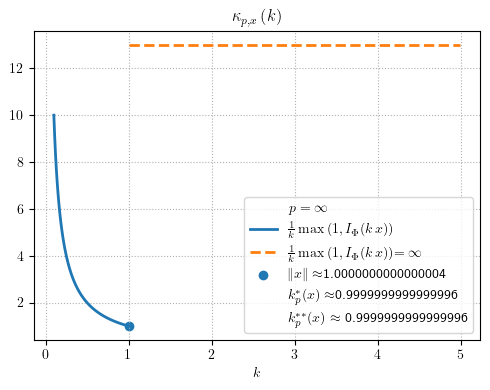

In [26]:
for p_norm in [1, 2, np.inf]:
    osm.plot_kappa(Orlicz_function, x_4,
                   k_min=k_min,
                   k_max=k_max,
                   dk=dk,
                   p_norm=p_norm,
                   save=False)

## $\alpha$ (alpha) and $\tau$ (tau) function
For any $k \in (0,\infty)$ define function
$\alpha_{p,x}(k)\colon (0,\infty) \rightarrow \left[-1, \infty \right]$ by formula
\begin{equation*}
\alpha_{p,x}(k) =\left\{ \begin{array}{lll}
                             I_{\Phi}^{p-1}(kx)I_{\Psi}(p_+(k|x|)) -1 & \text{if } & 1 \leq p <\infty,                        \\
                             -1                                       & \text{if}  & p=\infty \text{ and } I_{\Phi}(kx)\leq 1 \\
                             I_{\Psi}(p_+(k|x|))                      & \text{if } & p=\infty \text{ and } I_{\Phi}(kx) > 1
\end{array}
\right.
\end{equation*}
and, finally, define function
$\tau_{p,x}(k)\colon (0,\infty) \rightarrow \left[0,\infty\right]$ by formula
\begin{equation*}
\tau_{p,x}(k) =\left\{ \begin{array}{lll}
                           I_{\Psi}(p_+(k|x|))                                 & \text{if } & p =1,                                             \\
                           I_{\Phi}^{{1}/{q}}(kx)I_{\Psi}^{{1}/{p}}(p_+(k|x|)) & \text{if}  & 1 < p < \infty \text{ and } {1}/{p} + {1}/{q} = 1 \\
                           I_{\Phi}(kx)                                        & \text{if } & p=\infty.
\end{array}
\right.
\end{equation*}
Function $\alpha_{p,x}(k)$ is called the norm attainability indicator.

In [4]:
def Orlicz_function(u):
    return np.where(u <= 1, u, u ** 2)

x = np.array([[1], [3]])

In [ ]:
osm.plot_alpha(Orlicz_function, du=0.001, u_max=5, x=x,  p_norm=1)

counting of  $\alpha_{p=1,x}(k)$: 100%|██████████| 1000/1000 [00:00<00:00, 15250.85it/s]


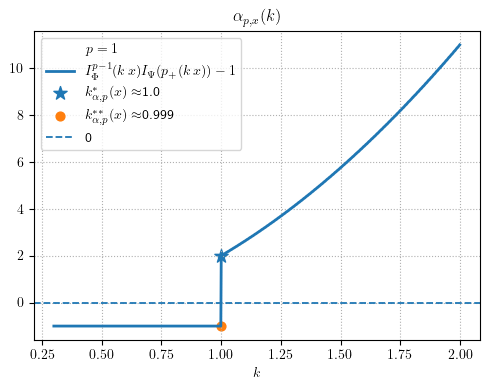

counting of  $\alpha_{p=2,x}(k)$: 100%|██████████| 1000/1000 [00:00<00:00, 15634.75it/s]


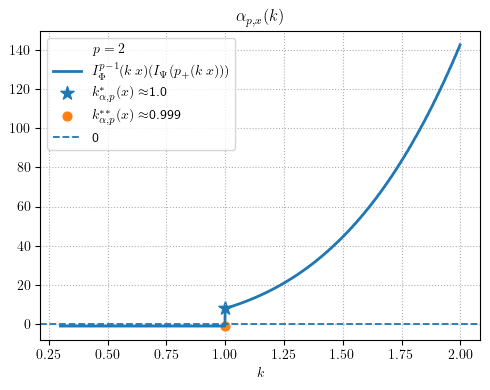

counting of  $\alpha_{p=inf,x}(k)$: 100%|██████████| 1000/1000 [00:00<00:00, 19243.02it/s]


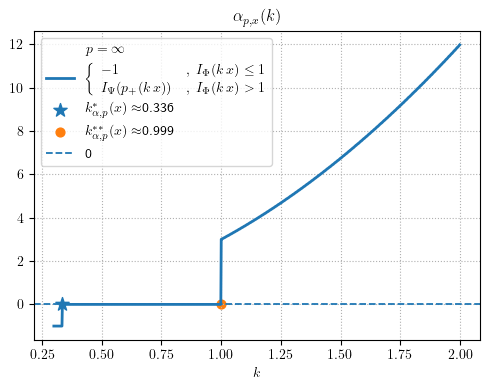

In [5]:
for p_norm in [1, 2, np.inf]:
    osm.plot_alpha(Orlicz_function, du=0.001, u_max=5, x=x,  p_norm=p_norm, k_max=2)